### Homewok#01
## Uinformed Search

Supanat Jintawatsakoon 60199130181 <br>
Ekkapob Poonsawat 60199130182

In [1]:
import matplotlib.pyplot as plt
import networkx as nx
from networkx.drawing.nx_agraph import write_dot, graphviz_layout

In [14]:
graph ={'a':{'b','e'},
       'b':{'a','c','d','h'},
       'c':{'b','h'},
       'd':{'b','g','h'},
       'e':{'a','f'},
       'f':{'e'},
       'g':{'d'},
       'h':{'c','d'}}

In [13]:
c = 'b'
graph[c]

{'a', 'c', 'd', 'h'}

In [3]:
def draw_graph(graph,digraph=False):
    if digraph:
        G = nx.DiGraph()
    else:
        G = nx.Graph()
        
    options = {
        'node_color': 'lime',
        'node_size': 600,
        'width': 1,
    }
    
    for n in graph.keys():
        G.add_node(n)

    for i in graph:
        nodes = graph[i]
        from_node = i;
        #print(from_node,':')
    
        for successor in nodes:
            G.add_edge(from_node, successor)
            #print(successor)    
    nx.draw(G,with_labels=True, **options); 

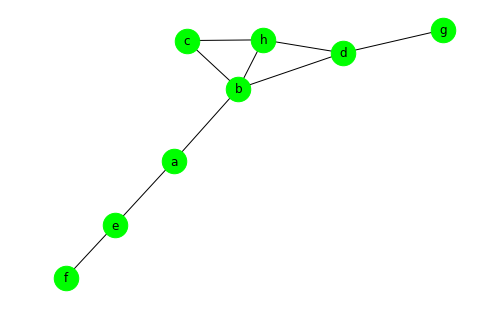

In [4]:
draw_graph(graph)

In [11]:
#BFS with queue as a list
bfsq=list()
start = 'a'
goal_state = 'g'
visit = []

parent = {}


#open new node
bfsq.append(start)

while len(bfsq)>0:    
    current_node = bfsq.pop(0) 
    #current_node = bfsq.pop()    
    if current_node == goal_state:
        #print('Goal state found at', current_node)
        path=[]
        current = goal_state
        path.append(goal_state)

        #print(parent[current])


        while path[-1] != start:
          current = parent[current]
          #print(current)
          path.append(current)
        
        path.reverse()
        print(path)
        print(current_node, 'Q : ',bfsq,' Visit : ',visit)

        break
    #get successor
    #print(current_node)
    if current_node not in visit:
        new_node = graph[current_node]
        print(new_node)    
        if len(new_node)>0:
            for newNode in new_node: 
              if newNode not in bfsq and newNode not in visit:
                #if newNode not in visit:


                bfsq.append(newNode)
                #bfsq.insert(0,newNode)
                parent[newNode] = current_node

       
        visit.append(current_node)
        #print(current_node,' new: ',new_node,' Q: ',bfsq,' Visit : ',visit)

               

{'b', 'e'}
{'c', 'h', 'a', 'd'}
{'f', 'a'}
{'b', 'h'}
{'c', 'd'}
{'g', 'b', 'h'}
{'e'}
['a', 'b', 'd', 'g']
g Q :  []  Visit :  ['a', 'b', 'e', 'c', 'h', 'd', 'f']


In [6]:
parent

{'e': 'a', 'b': 'a', 'f': 'e', 'd': 'b', 'c': 'b', 'h': 'b', 'g': 'd'}

In [24]:
def draw_tree(graph):
    G = nx.DiGraph()


    options = {
        'node_color': 'lime',
        'node_size': 600,
        'width': 1,
    }
    
    for n in graph.keys():
        G.add_node(n)

    for i in graph:
        nodes = graph[i]
        parent = i;
        #print(from_node,':')
    
        for successor in nodes:
            G.add_edge(successor, parent)
            #print(successor)    
    pos =graphviz_layout(G, prog='dot')
    nx.draw(G,pos,with_labels=True, **options); 

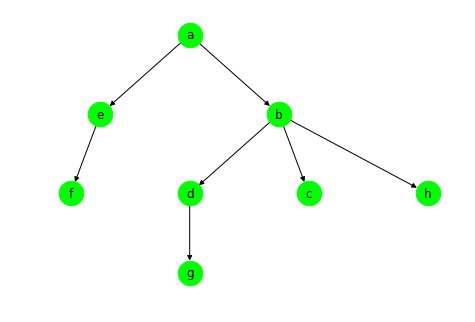

In [8]:
draw_tree(parent)

Q2

In [12]:
'''
graph ={'a':{('b',7),('c',3),('f',4)},
       'b':{('a',7),('d',5),('f',9)},
       'c':{('a',3),('d',6),('e',4)},
       'd':{('b',5),('c',6),('f',7)},
       'e':{('c',4),('f',1)},
       'f':{('a',4),('b',9),('d',7),('e',1)}}
'''
graph ={'a':{('b',3),('e',1)},
       'b':{('a',3),('c',4),('d',2),('h',5)},
       'c':{('b',4),('h',3)},
       'd':{('b',2),('g',9),('h',2)},
       'e':{('a',1),('f',6)},
       'f':{('e',6)},
       'g':{('d',9)},
       'h':{('c',3),('d',2)}}


import heapq
parent = {}
ucsq=[]
#ucsq keeps [(cost,next node,[path])]
start ='a'
goal_state = 'g'
visit=[]
cost=0
path=[]
next_node=start
heapq.heappush(ucsq,(cost,next_node,path))
while len(ucsq)>0:
    cost,current_node,path=heapq.heappop(ucsq)
    path_new=path+[current_node]
    print(current_node)
    if current_node == goal_state:
        print('Goal state found at', current_node, 'with path:', path_new, cost)
        
        break
    #finding succeeding nodes
    next_node=graph[current_node]
    if current_node not in visit:        
        for nextVertex,costEdge in next_node:
            cost_new=cost+int(costEdge)
            next_node=nextVertex            
            heapq.heappush(ucsq,(cost_new,next_node,path_new))
            
        visit.append(current_node)
        print(current_node,ucsq,visit)


a
a [(1, 'e', ['a']), (3, 'b', ['a'])] ['a']
e
e [(2, 'a', ['a', 'e']), (3, 'b', ['a']), (7, 'f', ['a', 'e'])] ['a', 'e']
a
b
b [(5, 'd', ['a', 'b']), (6, 'a', ['a', 'b']), (8, 'h', ['a', 'b']), (7, 'f', ['a', 'e']), (7, 'c', ['a', 'b'])] ['a', 'e', 'b']
d
d [(6, 'a', ['a', 'b']), (7, 'c', ['a', 'b']), (7, 'b', ['a', 'b', 'd']), (7, 'f', ['a', 'e']), (14, 'g', ['a', 'b', 'd']), (8, 'h', ['a', 'b']), (7, 'h', ['a', 'b', 'd'])] ['a', 'e', 'b', 'd']
a
b
c
c [(7, 'f', ['a', 'e']), (8, 'h', ['a', 'b']), (7, 'h', ['a', 'b', 'd']), (14, 'g', ['a', 'b', 'd']), (10, 'h', ['a', 'b', 'c']), (11, 'b', ['a', 'b', 'c'])] ['a', 'e', 'b', 'd', 'c']
f
f [(7, 'h', ['a', 'b', 'd']), (8, 'h', ['a', 'b']), (11, 'b', ['a', 'b', 'c']), (14, 'g', ['a', 'b', 'd']), (10, 'h', ['a', 'b', 'c']), (13, 'e', ['a', 'e', 'f'])] ['a', 'e', 'b', 'd', 'c', 'f']
h
h [(8, 'h', ['a', 'b']), (10, 'h', ['a', 'b', 'c']), (9, 'd', ['a', 'b', 'd', 'h']), (14, 'g', ['a', 'b', 'd']), (13, 'e', ['a', 'e', 'f']), (11, 'b', ['a', 'b'

<B>How to install graphviz <B><br>
brew install pkg-config <br>
brew install graphviz <br>
sudo pip install pygraphviz


Q3

In [27]:
#DFS with recursive calling
import sys

graph ={'a':{'b','e'},
       'b':{'a','c','d','h'},
       'c':{'b','h'},
       'd':{'b','g','h'},
       'e':{'a','f'},
       'f':{'e'},
       'g':{'d'},
       'h':{'c','d'}}

goal = 'g'
def dfs(node,graph,visit):
    global goal
    if node not in visit:
        visit.append(node)        
        for new_node in graph[node]:            
            if new_node == goal:
                print('Goal state found at: ',goal)
                print(visit) 
                exit
                #sys.exit(0)
            if new_node not in visit:
                print(new_node,visit)
                visit = dfs(new_node,graph,visit)
    return visit
start = 'a'
visit = dfs(start,graph,[])

b ['a']
c ['a', 'b']
h ['a', 'b', 'c']
d ['a', 'b', 'c', 'h']
Goal state found at:  g
['a', 'b', 'c', 'h', 'd']
g ['a', 'b', 'c', 'h', 'd']
e ['a', 'b', 'c', 'h', 'd', 'g']
f ['a', 'b', 'c', 'h', 'd', 'g', 'e']


In [16]:
digraph ={'a':{'b','e'},
       'b':{'c','d','h'},
       'c':{'h'},
       'd':{'g','h'},
       'e':{},
       'f':{'e'},
       'g':{},
       'h':{}}

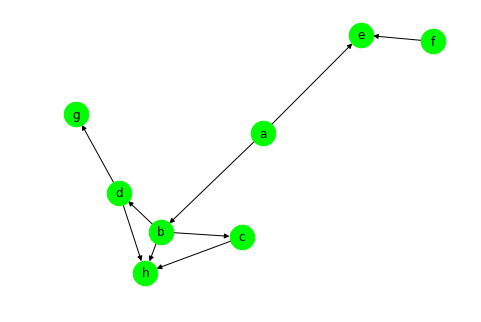

In [21]:
draw_graph(digraph,True)

In [22]:
#BFS with queue as a list
bfsq=list()
start = 'a'
goal_state = 'g'
visit = []

parent = {}


#open new node
bfsq.append(start)

while len(bfsq)>0:    
    current_node = bfsq.pop(0) 
    #current_node = bfsq.pop()    
    if current_node == goal_state:
        #print('Goal state found at', current_node)
        path=[]
        current = goal_state
        path.append(goal_state)

        #print(parent[current])


        while path[-1] != start:
          current = parent[current]
          #print(current)
          path.append(current)
        
        path.reverse()
        print(path)
        print(current_node, 'Q : ',bfsq,' Visit : ',visit)

        break
    #get successor
    #print(current_node)
    if current_node not in visit:
        new_node = digraph[current_node]
        #print(current_node,new_node,bfsq,visit)    
        if len(new_node)>0:
            for newNode in new_node: 
              if newNode not in bfsq and newNode not in visit:
                bfsq.append(newNode)
                #bfsq.insert(0,newNode)
                parent[newNode] = current_node

       
        visit.append(current_node)
        print(current_node,' new: ',new_node,' Q: ',bfsq,' Visit : ',visit)

               

a  new:  {'b', 'e'}  Q:  ['b', 'e']  Visit :  ['a']
b  new:  {'h', 'c', 'd'}  Q:  ['e', 'h', 'c', 'd']  Visit :  ['a', 'b']
e  new:  {}  Q:  ['h', 'c', 'd']  Visit :  ['a', 'b', 'e']
h  new:  {}  Q:  ['c', 'd']  Visit :  ['a', 'b', 'e', 'h']
c  new:  {'h'}  Q:  ['d']  Visit :  ['a', 'b', 'e', 'h', 'c']
d  new:  {'g', 'h'}  Q:  ['g']  Visit :  ['a', 'b', 'e', 'h', 'c', 'd']
['a', 'b', 'd', 'g']
g Q :  []  Visit :  ['a', 'b', 'e', 'h', 'c', 'd']


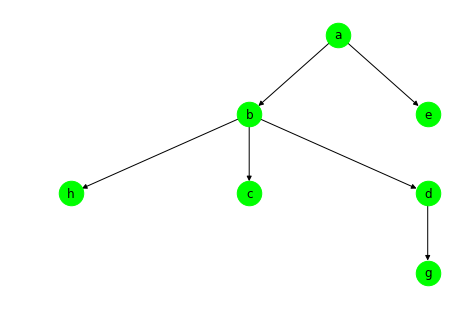

In [25]:
draw_tree(parent)

In [18]:
digraph2 ={'a':{('b',7),('c',3),('f',4)},
       'b':{('a',7),('d',5),('f',9)},
       'c':{('a',3),('d',6),('e',4)},
       'd':{('b',5),('c',6),('f',7)},
       'e':{('c',4),('f',1)},
       'f':{('a',4),('b',9),('d',7),('e',1)}}


import heapq
parent = {}
ucsq=[]
#ucsq keeps [(cost,next node,[path])]
start ='a'
goal_state = 'g'
visit=[]
cost=0
path=[]

next_node=start
heapq.heappush(ucsq,(cost,next_node,path))
while len(ucsq)>0:
    cost,current_node,path=heapq.heappop(ucsq)
    path_new=path+[current_node]
    print(current_node)
    if current_node == goal_state:
        print('Goal state found at', current_node, 'with path:', path_new, cost)
        
        break
    #finding succeeding nodes
    next_node=digraph2[current_node]
    if current_node not in visit:        
        for nextVertex,costEdge in next_node:
            cost_new=cost+int(costEdge)
            next_node=nextVertex            
            heapq.heappush(ucsq,(cost_new,next_node,path_new))
            
        visit.append(current_node)
        print(current_node,ucsq,visit)



a
a [(3, 'c', ['a']), (7, 'b', ['a']), (4, 'f', ['a'])] ['a']
c
c [(4, 'f', ['a']), (6, 'a', ['a', 'c']), (7, 'e', ['a', 'c']), (9, 'd', ['a', 'c']), (7, 'b', ['a'])] ['a', 'c']
f
f [(5, 'e', ['a', 'f']), (7, 'b', ['a']), (6, 'a', ['a', 'c']), (9, 'd', ['a', 'c']), (13, 'b', ['a', 'f']), (7, 'e', ['a', 'c']), (8, 'a', ['a', 'f']), (11, 'd', ['a', 'f'])] ['a', 'c', 'f']
e
e [(6, 'a', ['a', 'c']), (6, 'f', ['a', 'f', 'e']), (7, 'e', ['a', 'c']), (7, 'b', ['a']), (13, 'b', ['a', 'f']), (11, 'd', ['a', 'f']), (8, 'a', ['a', 'f']), (9, 'd', ['a', 'c']), (9, 'c', ['a', 'f', 'e'])] ['a', 'c', 'f', 'e']
a
f
b
b [(7, 'e', ['a', 'c']), (9, 'c', ['a', 'f', 'e']), (8, 'a', ['a', 'f']), (9, 'd', ['a', 'c']), (13, 'b', ['a', 'f']), (11, 'd', ['a', 'f']), (14, 'a', ['a', 'b']), (12, 'd', ['a', 'b']), (16, 'f', ['a', 'b'])] ['a', 'c', 'f', 'e', 'b']
e
a
c
d
d [(11, 'd', ['a', 'f']), (12, 'd', ['a', 'b']), (14, 'b', ['a', 'c', 'd']), (14, 'a', ['a', 'b']), (13, 'b', ['a', 'f']), (16, 'f', ['a', 'c', 'd